In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
initial=np.loadtxt("initialStateDistribution.txt")
emission=np.loadtxt("emissionMatrix.txt")
observation=np.loadtxt("observations.txt",dtype=int)
transition=np.loadtxt("transitionMatrix.txt")

print(initial.shape)
print(emission.shape)
print(observation.shape)
print(transition.shape)


(27,)
(27, 2)
(430000,)
(27, 27)


In [8]:
#calculate the first column in the L
L = np.zeros((initial.shape[0],observation.shape[0]))
#print(L.shape)

L[:,0] = np.log(initial)+np.log(emission[:,observation[0]])



In [9]:
#computing the matrix l*
for i in  range(1,observation.shape[0]):
    temp1= np.max(L[:,i-1].reshape(-1,1)+np.log(transition),axis=0)
    temp2= np.log(emission[:,observation[i]])
    L[:,i]=temp1+temp2


In [11]:
#computing{s1*,s2*,....sT*}
T=observation.shape[0]
phi=np.zeros((initial.shape[0],observation.shape[0]))
for i in range(1,T):
     phi[:,i] = np.argmax(L[:,i-1].reshape(-1,1) + np.log(transition), axis=0)
    

M=np.zeros(T)
M[-1]=np.argmax(L[:, -1]) 
for i in range(T-1,0,-1):
    M[i-1]=phi[int(M[i]),i]


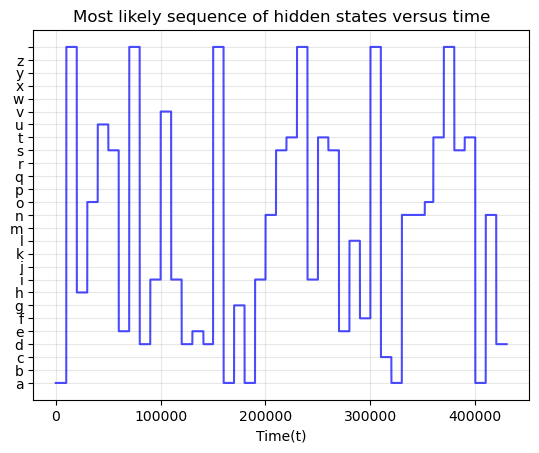

In [14]:
# plot of the most likely sequence of hidden states versus time. 

plt.plot(M, 'b-', alpha=0.7)
plt.title('Most likely sequence of hidden states versus time')
plt.xlabel("Time(t)")
alphabet = list('abcdefghijklmnopqrstuvwxyz ')
plt.yticks(range(0, 27), alphabet)
plt.grid(True, alpha=0.3)
plt.show()


In [56]:
#decode
import string
alphaDict = dict(zip(range(1,28), string.ascii_lowercase + ' '))
message=[]
for i in range(T-1):
     if M[i]!=M[i+1]:
        message.append(alphaDict.get(M[i]+1))
message.append(alphaDict.get(M[T-1]+1))
message=" ".join(message)
print(message)

a   h o u s e   d i v i d e d   a g a i n s t   i t s e l f   c a n o t   s t a n d
